In [3]:
import pandas as pd
import os

In [4]:
path=r'D:/Study/Hackathon analytics vidhya/Hackathon AV hiring  10092020/'
train_df=pd.read_csv(os.path.join(path,'train.csv'))
test_df=pd.read_csv(os.path.join(path,'test.csv'))
submission_df=pd.read_csv(os.path.join(path,'sample.csv'))
combine_set1 =pd.read_csv(os.path.join(path,'combine_data_train_test6.csv'))

In [7]:
combine_set1 =combine_set1.drop(['Unnamed: 7'],axis= 1)

In [8]:
combine_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14572 entries, 0 to 14571
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Office_PIN                               14572 non-null  object 
 1   Applicant_City_PIN                       14572 non-null  object 
 2   Manager_Grade                            14572 non-null  int64  
 3   Manager_Num_Application                  14572 non-null  int64  
 4   Manager_Num_Coded                        14572 non-null  int64  
 5   Manager_num_Product_diff                 14572 non-null  int64  
 6   Manager_Business_Diff                    14572 non-null  int64  
 7   Application_Receipt_Date_Count           14572 non-null  object 
 8   Applicant_Age                            14572 non-null  object 
 9   Manager_Exp                              14572 non-null  object 
 10  Manager_Age                              14572

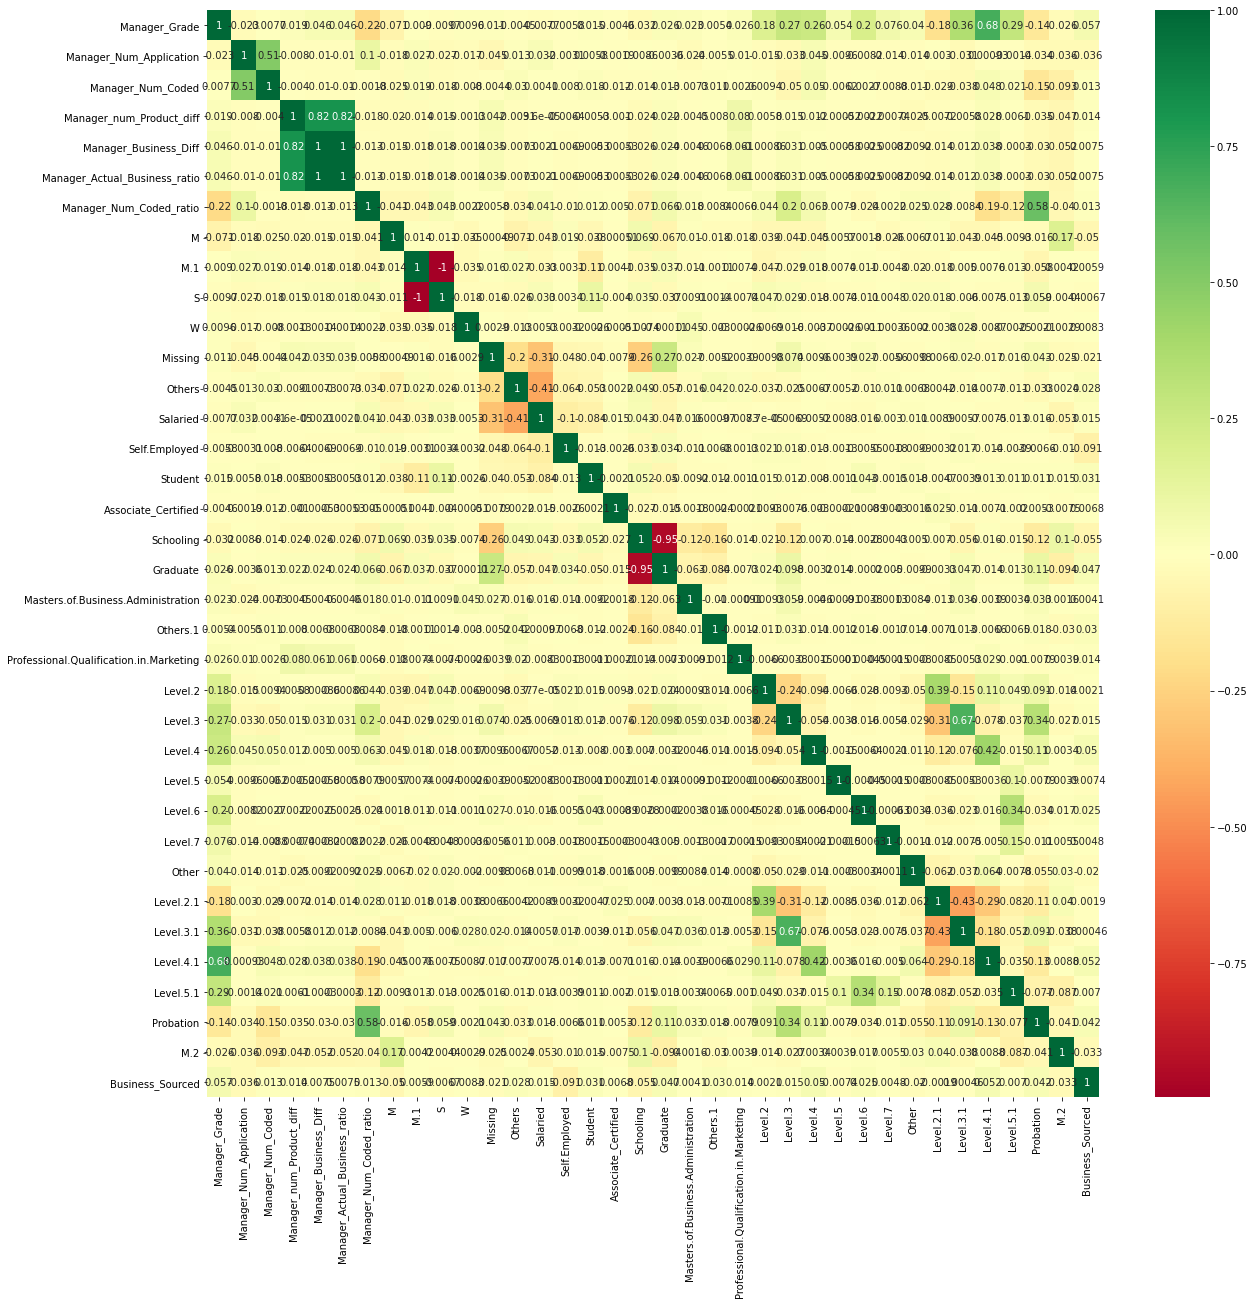

In [11]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
X=combine_set1[combine_set1['Business_Sourced'].isnull()==False]
df= X.copy()
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
for col in combine_set1.select_dtypes(include='object').columns:
    if col not in ['Business_Sourced']:
#         fe=combine_set.groupby([col]).size()/len(combine_set)
#         combine_set[col]=combine_set[col].apply(lambda x: fe[x])
        df=pd.get_dummies(combine_set1[col],drop_first=True)
        combine_set2=pd.concat([combine_set1,df],axis=1).drop([col],axis=1)
    elif col!='Business_Sourced':
        combine_set[col]=le.fit_transform(combine_set[col].astype(str))
    else:
        pass

In [48]:
for col in combine_set2.select_dtypes(include='object').columns:
    if col not in ['Business_Sourced']:
#         fe=combine_set.groupby([col]).size()/len(combine_set)
#         combine_set[col]=combine_set[col].apply(lambda x: fe[x])
        df=pd.get_dummies(combine_set2[col],drop_first=True)
        combine_set2=pd.concat([combine_set2,df],axis=1).drop([col],axis=1)
    elif col!='Business_Sourced':
        combine_set[col]=le.fit_transform(combine_set[col].astype(str))
    else:
        pass

In [49]:
combine_set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14572 entries, 0 to 14571
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Manager_Grade                            14572 non-null  int64  
 1   Manager_Num_Application                  14572 non-null  int64  
 2   Manager_Num_Coded                        14572 non-null  int64  
 3   Manager_num_Product_diff                 14572 non-null  int64  
 4   Manager_Business_Diff                    14572 non-null  int64  
 5   Manager_Actual_Business_ratio            14572 non-null  int64  
 6   Manager_Num_Coded_ratio                  14572 non-null  int64  
 7   M                                        14572 non-null  int64  
 8   M.1                                      14572 non-null  int64  
 9   S                                        14572 non-null  int64  
 10  W                                        14572

In [50]:
#combine_set2.to_csv("combine_set_train_test7.csv",index=False)

In [60]:
combine_set2 =pd.read_csv(os.path.join(path,'combine_set_train_test7.csv'))

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df = combine_set2.copy()
#Get the Independent and Dependent Features
X=combine_set2[combine_set2['Business_Sourced'].isnull()==False].drop(['Business_Sourced'],axis=1)
Y=le.fit_transform(combine_set2[combine_set2['Business_Sourced'].isnull()==False]['Business_Sourced'])
Y=pd.DataFrame(Y,columns=['Business_Sourced'])
X_main_test=combine_set2[combine_set2['Business_Sourced'].isnull()==True].drop(['Business_Sourced'],axis=1)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9526
Data columns (total 73 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Manager_Grade                            9527 non-null   int64
 1   Manager_Num_Application                  9527 non-null   int64
 2   Manager_Num_Coded                        9527 non-null   int64
 3   Manager_num_Product_diff                 9527 non-null   int64
 4   Manager_Business_Diff                    9527 non-null   int64
 5   Manager_Actual_Business_ratio            9527 non-null   int64
 6   Manager_Num_Coded_ratio                  9527 non-null   int64
 7   M                                        9527 non-null   int64
 8   M.1                                      9527 non-null   int64
 9   S                                        9527 non-null   int64
 10  W                                        9527 non-null   int64
 11  Miss

In [63]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [65]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [66]:
classifier=xgboost.XGBClassifier()

In [75]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=20,verbose=3)

In [76]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 20 folds for each of 5 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.9s finished
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[08:05:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



 Time taken: 0 hours 0 minutes and 38.63 seconds.


In [77]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, nthread=0, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [78]:

random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [81]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, nthread=0, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None,
              objective='binary:logistic')

In [82]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=30)

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[08:08:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:08:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:08:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[08:08:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:08:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:08:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [83]:

score

array([0.66981132, 0.6572327 , 0.66352201, 0.66037736, 0.65408805,
       0.66037736, 0.6572327 , 0.68238994, 0.67610063, 0.66352201,
       0.66352201, 0.64465409, 0.66352201, 0.63207547, 0.64465409,
       0.6163522 , 0.6572327 , 0.62460568, 0.6214511 , 0.64353312,
       0.62460568, 0.64984227, 0.65615142, 0.62776025, 0.6340694 ,
       0.65299685, 0.6340694 , 0.66876972, 0.66561514, 0.66876972])

In [84]:
score.mean()

0.6512968804766911

In [87]:
classifier.fit(X,Y)
y_test_pred_xgb=classifier.predict(X_main_test)
finalpred=pd.concat([test_df['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("xgbpred5.csv",index=False)

[08:10:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [89]:
from sklearn.model_selection import KFold,StratifiedKFold
from lightgbm import LGBMClassifier
param_set = {
 'n_estimators':[20, 50]
}

gsearch = GridSearchCV(estimator = LGBMClassifier( boosting_type='gbdt', num_leaves=30, max_depth=5, learning_rate=0.1, n_estimators=50, max_bin=225, 
 subsample_for_bin=0.8, objective=None, min_split_gain=0, 
 min_child_weight=5, 
 min_child_samples=10, subsample=1, subsample_freq=1, 
colsample_bytree=1, 
reg_alpha=1, reg_lambda=0, seed=410, nthread=7, silent=True), 
param_grid = param_set, scoring='roc_auc',n_jobs=7,iid=False, cv=10)


In [91]:
lgb_model2 = gsearch.fit(X, Y)
#lgb_model2.grid_scores_, lgb_model2.best_params_, lgb_model2.best_score_

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LightGBMError: Parameter bin_construct_sample_cnt should be of type int, got "0.8"

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X, Y)
# make a single prediction
#row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
#classifier.fit(X,Y)


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [95]:
y_test_pred_xgb=model.predict(X_main_test)
finalpred=pd.concat([test_df['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("gbm1.csv",index=False)

In [97]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# evaluate the model
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(X, Y)

Accuracy: 0.657 (0.009)


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier()

In [98]:
y_test_pred_xgb=model.predict(X_main_test)
finalpred=pd.concat([test_df['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("lgbm1.csv",index=False)

In [99]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X, Y)

Accuracy: 0.655 (0.011)


In [100]:
y_test_pred_xgb=model.predict(X_main_test)
finalpred=pd.concat([test_df['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("catbm1.csv",index=False)

## Optimal THreshold value binary classification

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [102]:
X.shape

(9527, 73)

In [105]:
y =Y.copy()

In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest

In [127]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_test_pred=rf_model.predict_proba(X_main_test)

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RF train roc-auc: 0.9998807806536694
RF test roc-auc: 0.5930996187724691


In [112]:
ytrain_pred

array([[0.84, 0.16],
       [0.86, 0.14],
       [0.85, 0.15],
       ...,
       [0.9 , 0.1 ],
       [0.3 , 0.7 ],
       [0.29, 0.71]])

### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
y_test_pred=rf_model.predict_proba(X_main_test)

Logistic train roc-auc: 0.5210109501148128
Logistic test roc-auc: 0.4895708203451684


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Adaboost Classifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Adaboost train roc-auc: 0.627665106318805
Adaboost test roc-auc: 0.5778964060344733


### KNN Classifier

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Adaboost train roc-auc: 0.7818052913029163
Adaboost test roc-auc: 0.5579476708192591


###  best threshold for maximum accuracy

In [117]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.5793243800979679


In [119]:
#pred
pd.concat(pred,axis=1)

,0,1,2,3
0,0.515000,0.352295,0.497746,0.4
1,0.150000,0.391093,0.497365,0.0
2,0.390000,0.387483,0.497790,0.2
3,0.310000,0.371187,0.497002,0.4
4,0.210000,0.367013,0.495700,0.0
...,...,...,...,...
2854,0.440000,0.367012,0.497648,0.4
2855,0.330000,0.428067,0.501079,0.2
2856,0.450833,0.324058,0.496585,0.8
2857,0.220000,0.325228,0.494969,0.4


In [120]:
final_prediction

0       0.441260
1       0.259614
2       0.368818
3       0.394547
4       0.268178
          ...   
2854    0.426165
2855    0.364786
2856    0.517869
2857    0.360049
2858    0.291504
Length: 2859, dtype: float64

In [122]:
#### Calculate the ROc Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.69274211, 0.69274211, 0.6388585 , ..., 0.2188862 , 0.21748991,
       0.16875614])

In [123]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
103,0.520086,0.658622
102,0.520149,0.658272
104,0.519900,0.658272
105,0.519123,0.657573
106,0.518928,0.657223


In [124]:
accuracy_ls

,thresholds,accuracy
103,0.520086,0.658622
102,0.520149,0.658272
104,0.519900,0.658272
105,0.519123,0.657573
106,0.518928,0.657223
...,...,...
1318,0.225496,0.346974
1324,0.220430,0.346625
1325,0.218886,0.346275
1326,0.217490,0.346275


In [125]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

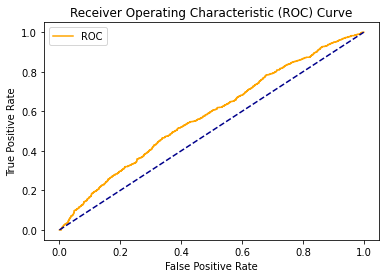

In [126]:
plot_roc_curve(fpr,tpr)

In [129]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_main_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)

In [130]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.17,0.412807,0.497002,0.2
1,0.28,0.390544,0.498988,0.0
2,0.25,0.367729,0.495693,0.2
3,0.21,0.366182,0.497149,0.6
4,0.27,0.330742,0.494538,0.0
...,...,...,...,...
5040,0.49,0.412015,0.501254,0.6
5041,0.49,0.406008,0.500638,0.6
5042,0.41,0.402434,0.497769,0.4
5043,0.41,0.327151,0.495617,0.4


In [131]:
final_prediction

0       0.319952
1       0.292383
2       0.328356
3       0.418333
4       0.273820
          ...   
5040    0.500817
5041    0.499161
5042    0.427551
5043    0.408192
5044    0.398493
Length: 5045, dtype: float64

In [132]:
final_prediction.to_csv('final_pred_thresh.csv', index =False)